In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np


In [2]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [3]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.cifar10.load_data()

In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
def plot_sample(index):
    plt.figure(figsize=(10,1))
    plt.imshow(x_train[index])

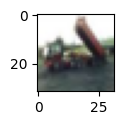

In [7]:

plot_sample(2)

In [8]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [9]:
classes[y_train[2][0]]

'truck'

In [10]:
x_train_scaled=x_train/255
x_test_scaled=x_test/255

In [11]:
y_train_categorical=keras.utils.to_categorical(
    y_train,num_classes=10
)

In [12]:
y_test_categorical=keras.utils.to_categorical(
    y_test,num_classes=10 
)

In [13]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000,activation='relu'),
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer='SGD',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train_scaled,y_train_categorical,epochs=10)

C:\Users\shibi\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
classes[np.argmax(model.predict(x_test_scaled)[10])]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


'airplane'

In [ ]:
classes[y_test[10][0]]

'airplane'

In [ ]:
model.evaluate(x_test_scaled,y_test_categorical)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5687 - loss: 1.5509


[1.5488513708114624, 0.5637999773025513]

In [ ]:
def get_model():
    model=keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000,activation='relu'),
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
    ])

    model.compile(
    optimizer='SGD',
    loss='categorical_crossentropy',
    metrics=['accuracy']
    )

    return model

In [ ]:
%%timeit -n1 -r1
cpu_model=get_model()
cpu_model.fit(x_train_scaled,y_train_categorical,epochs=1)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.3062 - loss: 1.9300
39.4 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
